# Pymaceuticals Inc.
---

### Analysis

- It appears that Capomulin is effective in treating tumors in mice
- We can safely assume that there is a correlation between mouse weight and tumor volume
- Infubinol has a number of outliers, so it would be difficult to determine if this drug regimen was effective
 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_mouse = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_study_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice.
total_mice = combined_study_mouse['Mouse ID'].nunique()
total_mice

249

In [124]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_mouse[combined_study_mouse.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [125]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_study_mouse[combined_study_mouse['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_study_mouse[combined_study_mouse['Mouse ID'] != 'g989']
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_combined['Mouse ID'].nunique()
clean_total_mice

248

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_combined.groupby('Drug Regimen') ['Tumor Volume (mm3)']
summary_stats = pd.DataFrame ({'Mean Tumor Volume': grouped.mean(),
                               'Median Tumor Volume': grouped.median(),
                               'Tumor Volume Variance': grouped.var(),
                               'Tumor Volume Std. Dev.': grouped.std(),
                               'Tumor Volume St. Err.': grouped.apply(lambda x: np.std(x) / np.sqrt(len(x)))})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [129]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = grouped.agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: np.std(x) / np.sqrt(len(x))
).reset_index()

summary_stats

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.514977


## Bar and Pie Charts

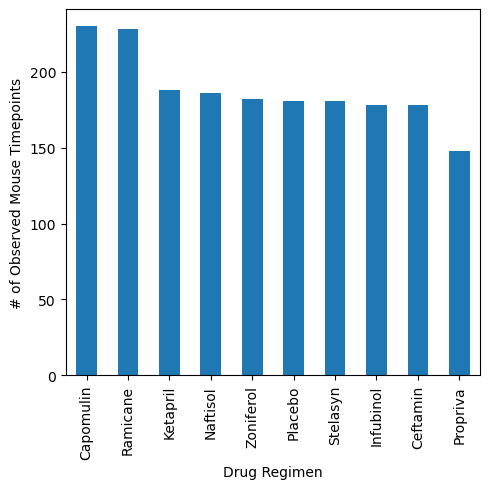

In [130]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_combined['Drug Regimen'].value_counts()
drug_count_sorted = drug_count.sort_values(ascending=False)
drug_count_sorted.plot(kind='bar', figsize=(5, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.tight_layout()
plt.show()

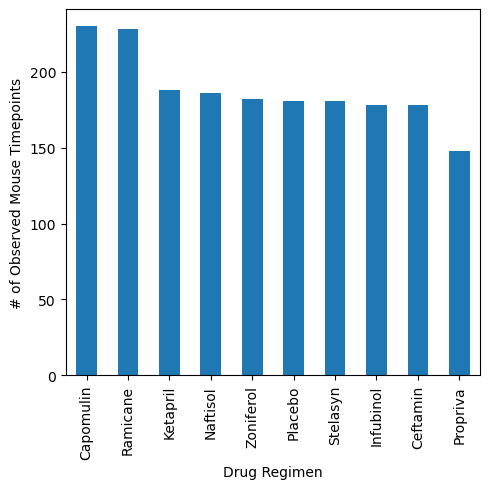

In [131]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count_sorted.plot(kind='bar', figsize=(5, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.tight_layout()
plt.show()

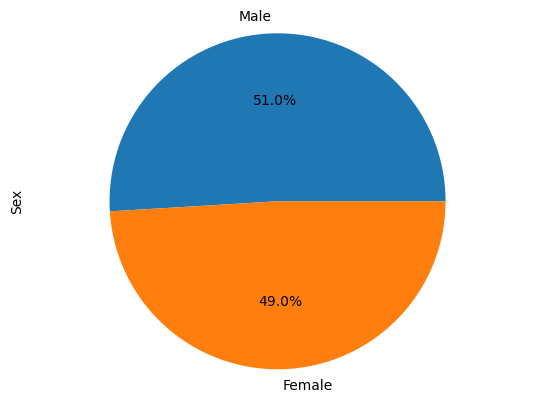

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_dist = clean_combined['Sex'].value_counts()

sex_dist.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

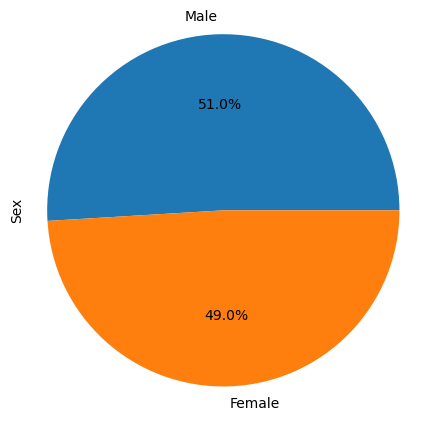

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution = clean_combined['Sex'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the final tumor volume of each mouse across the specified treatment regimens
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_combined.groupby('Mouse ID')['Timepoint'].last().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(clean_combined[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], 
                              last_timepoint, 
                              how='right', 
                              on='Mouse ID')

# Filter rows where 'Timepoint_x' matches 'Timepoint_y' to get the final tumor volume
final_tumor_volume = final_tumor_volume[final_tumor_volume['Timepoint_x'] == final_tumor_volume['Timepoint_y']]

# Select only the required columns
final_tumor_volume = final_tumor_volume[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', 'Timepoint_x']]

# Rename columns for clarity
final_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume', 'Timepoint_x': 'Final Timepoint'}, inplace=True)
final_tumor_volume


,Drug Regimen,Mouse ID,Final Tumor Volume,Final Timepoint
9,Infubinol,a203,67.973419,45
19,Infubinol,a251,65.525743,45
29,Placebo,a262,70.717621,45
39,Ceftamin,a275,62.999356,45
46,Stelasyn,a366,63.440686,30
...,...,...,...,...
1839,Propriva,z435,48.710661,10
1849,Ramicane,z578,30.638696,45
1859,Infubinol,z581,62.754451,45
1869,Naftisol,z795,65.741070,45


In [148]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Filter data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Final Tumor Volume']
    
    # Calculate quartiles
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store potential outliers in the dictionary
    tumor_volume_data[treatment] = outliers

# Print potential outliers for each treatment
for treatment, outliers in tumor_volume_data.items():
    print(f"{treatment}'s potential outliers: {outliers if not outliers.empty else 'None'}")

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 275    36.321346
Name: Final Tumor Volume, dtype: float64
Ceftamin's potential outliers: None


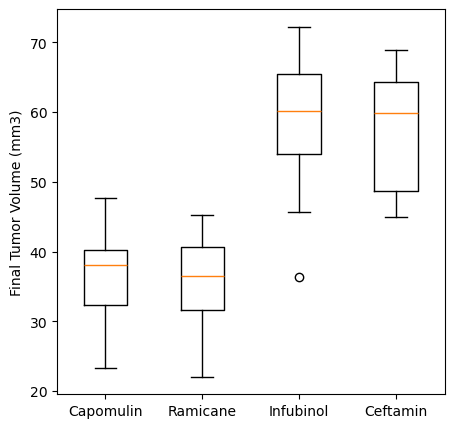

In [137]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to hold the tumor volume data for each treatment
tumor_volume_data = []

# Extract tumor volume data for each treatment and append to the list
for treatment in treatments:
    tumor_volume_data.append(final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Final Tumor Volume'].dropna())

# Create a box plot
plt.figure(figsize=(5, 5))
plt.boxplot(tumor_volume_data, labels=treatments)

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

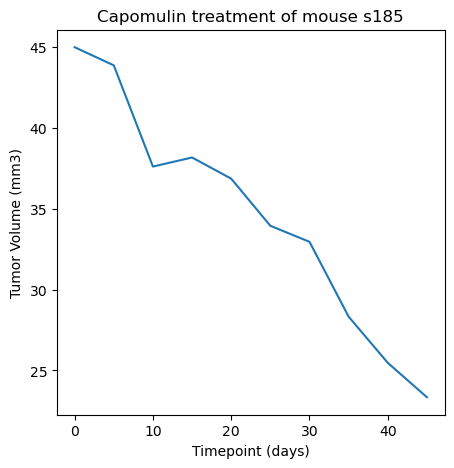

In [138]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for mice treated with Capomulin
capomulin_data = clean_combined[clean_combined['Drug Regimen'] == 'Capomulin']

# Filter data for the selected mouse ID '1509'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

# Create a line plot
plt.figure(figsize=(5, 5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])

# Add labels and title
plt.title('Capomulin treatment of mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

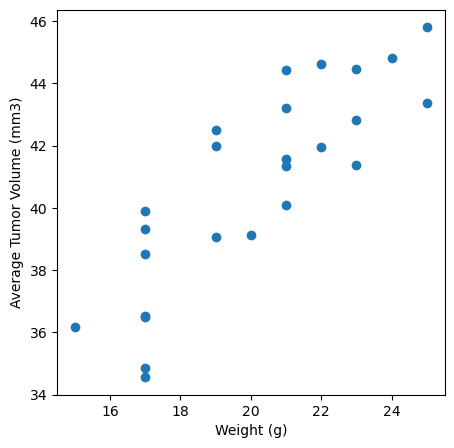

In [139]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with Capomulin
capomulin_data = clean_combined[clean_combined['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate the average weight and tumor volume
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(5,5))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


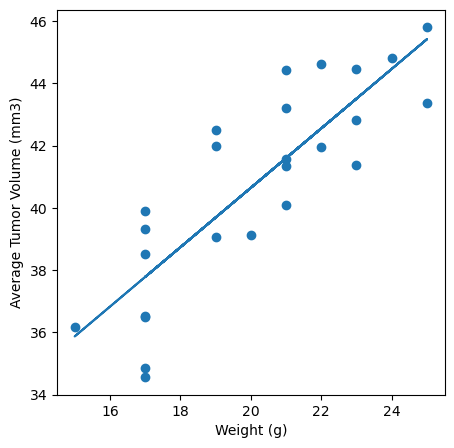

In [146]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with Capomulin
capomulin_data = clean_combined[clean_combined['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate the average weight and tumor volume
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Calculate the correlation coefficient
corr_coefficient, _ = pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {corr_coefficient:.2f}")

# Calculate the linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Add regression line
plt.plot(avg_data['Weight (g)'], slope * avg_data['Weight (g)'] + intercept)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()